In [121]:
import warnings 
from datetime import datetime
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os     ##This module provides a portable way of using operating system dependent functionality. 
              ##If you just want to read or write a file see open(), if you want to manipulate paths, see the os.path module

#### merging 12 month of sales data into a single file

In [122]:
files= [file for file in os.listdir("./Sales_Data")]
all_month= pd.DataFrame()
for file in files:
    df= pd.read_csv("./Sales_Data/"+file)
    all_month = pd.concat([all_month, df])
print(df)     
all_month.to_csv("all_month", index=False)

      Order ID                 Product Quantity Ordered Price Each  \
0       248151   AA Batteries (4-pack)                4       3.84   
1       248152    USB-C Charging Cable                2      11.95   
2       248153    USB-C Charging Cable                1      11.95   
3       248154        27in FHD Monitor                1     149.99   
4       248155    USB-C Charging Cable                1      11.95   
...        ...                     ...              ...        ...   
11681   259353  AAA Batteries (4-pack)                3       2.99   
11682   259354                  iPhone                1        700   
11683   259355                  iPhone                1        700   
11684   259356  34in Ultrawide Monitor                1     379.99   
11685   259357    USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      09/17/19 14:44      380 North St, Los Angeles, CA 90001  
1      09/29/19 10:19        

In [123]:
all_data = pd.read_csv("all_month")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### this is the way that we saw in video but we can explore some new and short way

In [4]:
all_m = pd.DataFrame()
for file in os.listdir("./Sales_Data"):
    dff = pd.read_csv('./Sales_Data/'+file)
    all_m = pd.concat([dff, all_m])
    
# all_m.head()

 now we will use "all_data" for dataframe from 1 attempt 

# clean up the data

In [5]:
### here the complete rows were null thats why we drop those rows

nan_data = all_data[all_data.isna().any(axis=1)]
nan_data.head()

all_data.dropna(inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### invalid literal for int() with base 10: 'Or' 
#### it means somewhere in column date is written as "order date" or something thats starting two word is "Or"
# find and delete "Or"

In [6]:
### rough work
###  we changes 'Or' value with nan value for practice but we notice that with order date address is not also defined 
### so, we should drop the column


# all_da = all_data['Order Date'].replace('Order Date', np.nan, regex=True)
# all_da.head(520) 
# all_da.isnull().sum()

In [7]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### get month colum seperate from order date  

In [8]:
## this is a one method where we get first two variable of string  
all_data['Month 2']= all_data['Order Date'].str[0:2]
all_data['Month 2']= all_data['Month 2'].astype('int32')

In [9]:
## this is alternative method 
all_data['month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


### make all required column numeric 

In [10]:
all_data['Price Each'].dtype ## now change it in numerical type to perform algebric calculation

dtype('O')

In [11]:
all_data['Price Each']= pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])

In [12]:
all_data= all_data.drop(columns='Month 2')
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


### make city colum for 2nd ques

In [13]:
all_data['city']= all_data['Purchase Address'].apply(lambda x: x.split(",")[1])

because some cities has duplicates name so it might effect our graph so, for that we need state name with that

In [14]:
## when we use function in lamda it becaomes more powerful and reliable
## to get rid of city code ("Dallas TX 75001")we use another split with sate function
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data['city_state']= all_data['Purchase Address'].apply(lambda x: get_city(x)+" ("+get_state(x)+")")


all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,Boston (MA)


# Ques1>> what was the month for best sale? how much was earned that month 

In [15]:
all_data['sales']= all_data['Quantity Ordered'] * all_data['Price Each']

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,Los Angeles (CA),11.99


In [17]:
all_data.groupby(['month']).sum()

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<AxesSubplot:xlabel='month'>

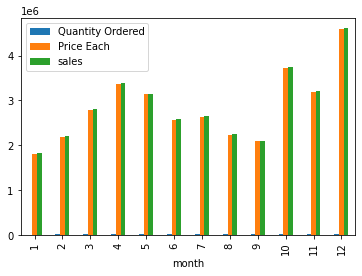

In [18]:
all_data.groupby(['month']).sum().plot(kind='bar')

Text(0, 0.5, 'Sales in USD ($)')

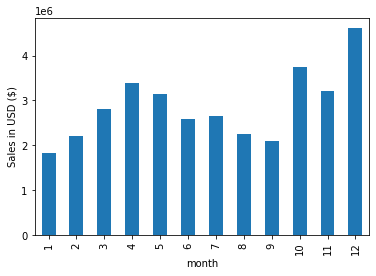

In [19]:
## if we want to plot with a specific column 
# amount = range(0,4000000)
all_data.groupby(['month']).sum()['sales'].plot(kind='bar')
# plt.yticks(amount)
plt.ylabel('Sales in USD ($)')

### conclusion : 
we can assume that most sale is done in december mey be because of cristmas and new year
but, 

## Question 2: Which city sold the most product?

In [20]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,Boston (MA),99.99


In [21]:
all_data.groupby('city_state').sum() 

,Quantity Ordered,Price Each,month,sales
city_state,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


<AxesSubplot:xlabel='city_state'>

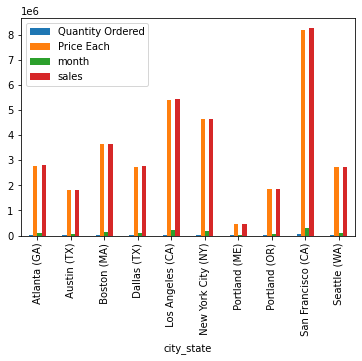

In [22]:
all_data.groupby('city_state').sum().plot(kind='bar')

<AxesSubplot:xlabel='city_state'>

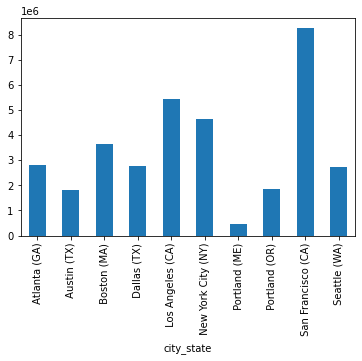

In [24]:
all_data.groupby('city_state').sum()['sales'].plot(kind='bar')

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

to claculate that we need time in hours 

In [28]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX),23.9


In [30]:
all_data['hour']= pd.to_datetime(all_data['Order Date']).dt.hour

In [32]:
all_data['count']= 1
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales,hour,count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX),23.9,8,1


In [44]:
all_data.groupby('hour').sum()

,Quantity Ordered,Price Each,month,sales,count
hour,,,,,
0,4428,709296.70,27554,713721.27,3910
1,2619,458490.00,16657,460866.88,2350
2,1398,233833.64,8507,234851.44,1243
3,928,144726.42,5904,145757.89,831
4,937,162058.18,6148,162661.01,854
5,1493,229621.21,9301,230679.82,1321
6,2810,445000.11,17539,448113.00,2482
7,4556,740568.11,28850,744854.12,4011
8,7002,1185970.62,43626,1192348.97,6256


<AxesSubplot:xlabel='hour'>

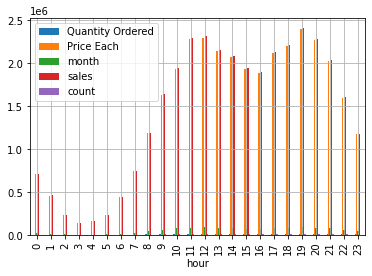

In [40]:
all_data.groupby('hour').sum().plot(kind='bar', grid=True)

conclude >>> we can show add between 9 am to 10 pm ... we should boostup add between 11am -12 am and 5pm - 9 pm 

### Question 4: What products are most often sold together?

In [60]:
all_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales,hour,count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,Dallas (TX),23.9,8,1


In [64]:
# we need to find set of product that are sold together for that we will make a new dataframe
# first get data with duplicate order id in a new dataframe

n_df = all_data[all_data['Order ID'].duplicated(keep=False)]
# we found that we have 14649 duplicate rows it means from 14649 order id multiple product are orders

# now make a column with mutiple poduct name 
n_df['grouped'] = n_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df2 = n_df[['Order ID', 'grouped']].drop_duplicates()

<ipython-input-64-fe6d8b73ddb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_df['grouped'] = n_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [67]:
## now we have sets of product that sold together
df2

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [68]:
## now our task is to find most purchased set of 2 and 3 both 

In [91]:
## basically counter used to go word by word(w o r d )like this 
from itertools import combinations, repeat
from collections import Counter

count = Counter()
for row in df2['grouped']:
    list_1 = row.split(",")
    count.update(Counter(combinations(list_1, 2)))
# print(count)
 
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [97]:
 all_data.groupby('Product').count()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,city_state,sales,hour,count
Product,,,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577,20577,20577
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641,20641,20641
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325,13325,13325
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800,4800
